In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize' : (12, 5)}, font='verdana')
from scipy import special
from scipy import stats
plt.style.use('dark_background')

In [61]:
t6 = np.random.normal(100,10,size = 100000)
t_se_sample = [np.random.choice(t6, n, False).std() for _ in range(1, 100)] #отклонение выборки
print(f'стандартное отклонение в распределении    {t6.std()}\n\
среднее стандартное отклонение в выборке  {pd.Series(t_se_sample).mean()}')

стандартное отклонение в распределении    9.96073829404086
среднее стандартное отклонение в выборке  9.61551183928037


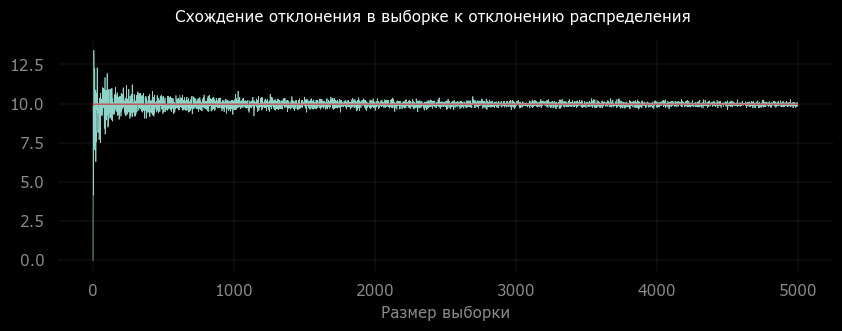

In [62]:
t_se_sample = pd.Series([np.random.choice(t6, n, False).std() for n in range(1, 5001)])

plt.figure(figsize=(10,3))

plt.suptitle('Схождение отклонения в выборке к отклонению распределения', fontsize=11)

plt.plot(t_se_sample.index, t_se_sample.values, linewidth=0.5)
plt.plot(t_se_sample.index, np.array([t6.std()]*5000), '-r',linewidth=1)
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("Размер выборки", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

С увеличением размера выборки ее стандартное отклонение сходится к отклонению всего распределения, а значит можно пробовть считать доверительный интервал выборки через ее стандартное отклонение

In [77]:
smpl = np.random.choice(t6, 50, False)
print(f'среднее распределения лежит между   {round(smpl.mean() - 2*smpl.std()/(50**0.5),2)} и {round(smpl.mean() + 2*smpl.std()/(50**0.5),2)} \n\
реальное среднее распределения      {round(t6.mean(), 2)}')

среднее распределения лежит между   96.57 и 102.9 
реальное среднее распределения      100.01


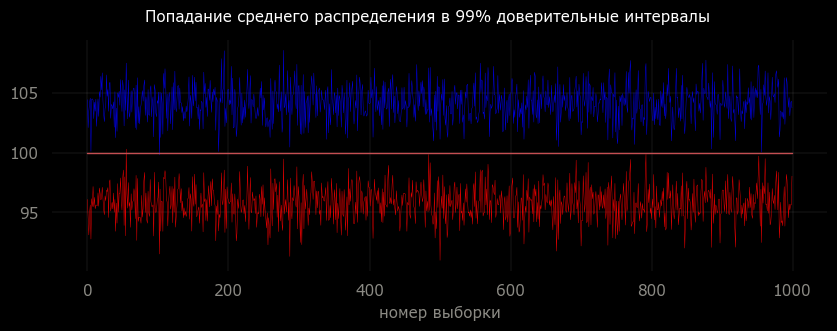

In [96]:
lft = []
rght = []
for _ in range(1, 1001):
    smpl = np.random.choice(t6, 50, False)
    lft.append(smpl.mean() - 3*smpl.std()/(50**0.5))
    rght.append(smpl.mean() + 3*smpl.std()/(50**0.5))

plt.figure(figsize=(10,3))

plt.suptitle('Попадание среднего распределения в 99% доверительные интервалы', fontsize=11)

plt.plot(pd.Series(lft).index, pd.Series(lft).values, linewidth=0.3, color = ('red'))
plt.plot(pd.Series(rght).index, pd.Series(rght).values, linewidth=0.3, color = 'blue')
plt.plot(pd.Series(lft).index, np.array([t6.mean()]*1000), '-r',linewidth=1)
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("номер выборки", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()

Резюмируем здесь:

- У нас было нормальное распределение с средним 100 и с разбросом, грубо от 60 до 140

- Из этого распределения мы взяли выборку и через ее среднее, стандартное отклонение и размер расчитали доверительные интервалы в которых с 99% вероятностью находится среднее всей последовательности

- При этом интервал получился, грубо, от 94 до 106

Нормализация распределений через z-score (мы знаем среднее и стандартное отклонение распределения - и используем их)

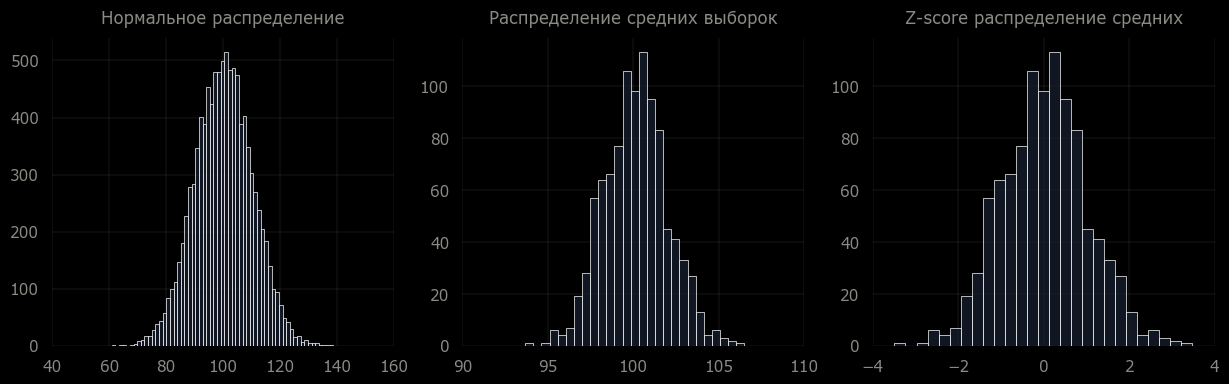

In [39]:
nd = np.random.normal(100,10,10000)
z_smpls=[]
smpls = []
for _ in range(1000):
    s = np.random.choice(nd, 30, False).mean()
    smpls.append(s)
    z_smpls.append((s-nd.mean()) / (nd.std()/(30**0.5)))

plt.figure(figsize=(15,4))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(1, 3, 1)
sns.histplot(nd, linewidth=0.5,color='#171e2f')
plt.title('Нормальное распределение', fontsize=12, y=1.02, color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(40, 160)
#plt.ylim(-5, 1005)
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(1, 3, 2)
sns.histplot(smpls, linewidth=0.5,color='#171e2f')
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Распределение средних выборок', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(90, 110)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(1, 3, 3)
sns.histplot(z_smpls, linewidth=0.5,color='#171e2f')
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Z-score распределение средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-4, 4)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()


Нормализация распределений через t-score (мы знаем среднее, но не знаем стандартное отклонение распределения, используем среднее распределение и стандартное отклонение выборки)

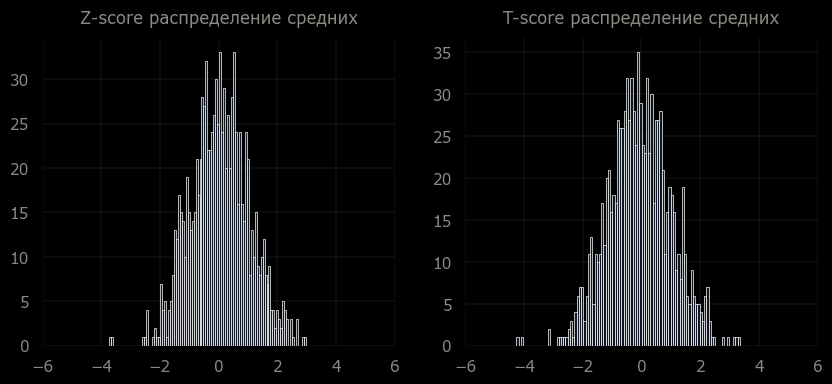

In [32]:
t_score_smpls=[]
smpls = []
for _ in range(1000):
    s = np.random.choice(nd, 30, False)
    smpls.append(s.mean())
    t_score_smpls.append((s.mean()-nd.mean()) / (s.std()/(30**0.5)))

plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(1, 2, 1)
sns.histplot(z_smpls, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Z-score распределение средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-6, 6)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(1, 2, 2)
sns.histplot(t_score_smpls, linewidth=0.5,color='#171e2f', bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('T-score распределение средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-6, 6)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()


Из-за того, что в конктреной выборке отклоенние может быть заметно больше или меньше отклонения во всем распределении - меняется знаменатель в большую и меньшую сторону и T-score начинает сильнее разбрасывать значения по оси х чем z-score.

Чем меньше выборка, тем сильнее отклонение выборки может отличаться от распределения.

Вот пример для выборок из 5 значений вместо 30

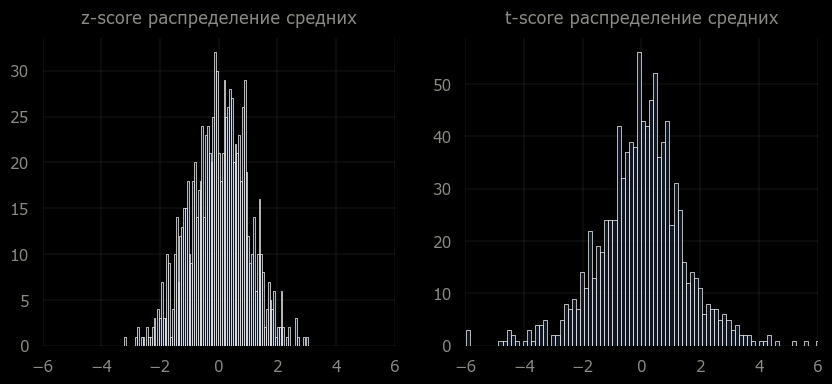

In [34]:
t_score_smpls=[]
smpls = []
z_smpls = []
for _ in range(1000):
    s = np.random.choice(nd, 5, False)
    smpls.append(s.mean())
    t_score_smpls.append((s.mean()-nd.mean()) / (s.std()/(5**0.5)))
    z_smpls.append((s.mean()-nd.mean()) / (nd.std()/(5**0.5)))

plt.figure(figsize=(10,4))
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(1, 2, 1)
sns.histplot(z_smpls, linewidth=0.5,color='#171e2f',bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('z-score распределение средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-6, 6)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(1, 2, 2)
sns.histplot(t_score_smpls, linewidth=0.5,color='#171e2f', bins = 100)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('t-score распределение средних', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlim(-6, 6)
#plt.ylim(-5, 1005)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

Напишем функцию, которая считает минимальный и максимальный z и t score для 1000 выборок из n элементов nd распределения 

In [62]:
def z_t_min_max (nd, n):
    z_min = float('inf')
    z_max = float('-inf')
    t_min = float('inf')
    t_max = float('-inf')
    for _ in range(1000):
        s = np.random.choice(nd, n, False)
        ts = (s.mean()-nd.mean()) / (s.std()/(5**0.5))
        zs = (s.mean()-nd.mean()) / (nd.std()/(5**0.5))
        if ts > t_max:
            t_max = ts
        if ts < t_min:
            t_min = ts
        if zs > z_max:
            z_max = ts
        if zs < z_min:
            z_min = ts
    return [z_min, z_max, t_min, t_max]  


Теперь посмотрим на сходимость t-score к z-score в зависимости от объема выборки

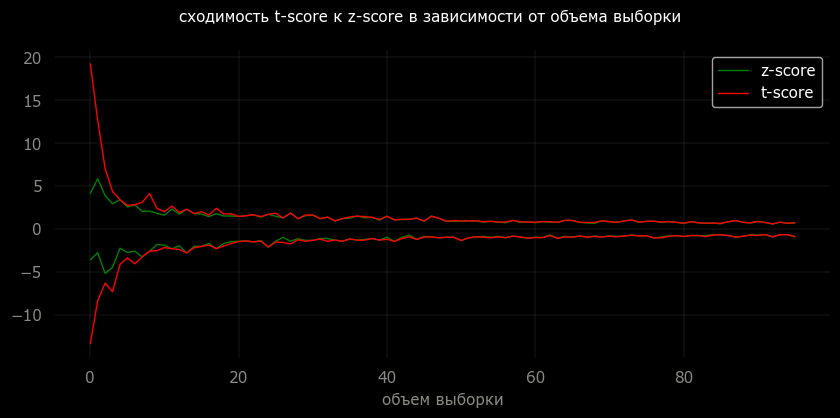

In [83]:
ndist = np.random.normal(100,20,10000)
zt = []
[zt.append(z_t_min_max (ndist, n)) for n in range(4, 100, 1)]
zt_df = pd.DataFrame(zt)
zt_df.columns = ['z_min', 'z_max', 't_min', 't_max']

plt.figure(figsize=(10,4))
plt.suptitle('сходимость t-score к z-score в зависимости от объема выборки', fontsize=11)
plt.plot(zt_df.index, zt_df.z_min, linewidth=1, color = ('green'), label='z-score')
plt.plot(zt_df.index, zt_df.z_max, linewidth=1, color = ('green'))
plt.plot(zt_df.index, zt_df.t_min, linewidth=1, color = ('red'), label='t-score')
plt.plot(zt_df.index, zt_df.t_max, linewidth=1, color = ('red'))
plt.legend(loc='upper right')
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("объем выборки", labelpad = 5, fontsize= 11, color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 
plt.show()


Как мы и предполагали z-score всегда лежит внутри t-score и где-то с 30 значений различия практически исчезают. То есть, в расчете доверительных интервалов множитель нужно чуть увеличивать при расчете, таблица коррекции множителя для доверительного интеревала заданной вероятности https://media.geeksforgeeks.org/wp-content/uploads/20230523152036/t-table-(1).webp

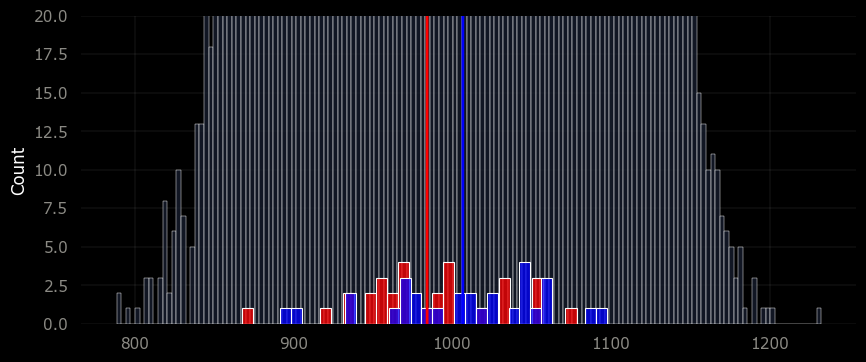

In [185]:
mnd = np.random.normal(1000,50,100000)
smpl1 = np.random.choice(mnd, 30,False)
smpl2 = np.random.choice(mnd, 30,False)

plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(mnd, color='#171e2f')
sns.histplot(smpl1, bins = 30, color='red')
sns.histplot(smpl2, bins = 30,color='blue')
plt.plot(np.array([smpl1.mean()]*100000), np.array(range(0,100000)), 'red',linewidth=2)
plt.plot(np.array([smpl2.mean()]*100000), np.array(range(0,100000)), 'blue',linewidth=2)
plt.ylim(0, 20)

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

На картинке выше мы имеем две выборки - красную и синюю. Если они принадлежат одному распределению (серому), то это два наряда одной и той же дамы. Если нет, то это две разные дамы.

Нулевая гипотеза всегда в том, что дама одна, потому что только это мы можем проверить. Ибо именно из этого предположеняи следует, что средние обоих распределений должны укладываться в нормальное распределение средних всех выборок - в спектр цветов нарядов этой дамы. При этом ширина цветового спектра известна - это ширина распределения среднего средних.  

И если расстояние между средними превышает этот диапазон, то скорее всего эта дама не может носить один из этих двух нарядов - он ей бы не подошел. А значит, дамы - разные.

А если расстояние меньше, то это либо одна и таже дама в разных нарядах, либо две разные дамы в похожих нарядах (ошибка второго рода). 

In [186]:
stats.ttest_ind(smpl1, smpl2)

TtestResult(statistic=np.float64(-1.7836490233982478), pvalue=np.float64(0.07971265836706631), df=np.float64(58.0))

В данном случае p-value > 0.05 а значит мы не модем сказать что эти две выборки - не принадлежат одному распределению.

При этом для расчета т-теста нам не надо знать среднее всего распределение, потому что нулевая гипотеза в том, что две изучаемые выборки принадлежат одному распределению, нас интересует расстояние между срдними выборок и среднее самого распределения нам для этого не нужно. Хитро! -)

In [4]:
url='https://drive.usercontent.google.com/download?id=1lLACe9pNJZZw2fj8KMBcyORWVoKshu9h&export=download&authuser=0&confirm=t&uuid=0cf51392-a628-40aa-bf8c-9073e65043f0&at=APvzH3ruxV2-onNOfF0gkBtDW2Xc%3A1733726731179'
df = pd.read_csv(url)

Поковыряем практический пример

In [83]:
ads_data = df

In [84]:
ads_data = ads_data.groupby(['ad_id','ad_cost_type','platform','event'], as_index = False).agg({'user_id':'count'})
ads_data = ads_data.pivot(index = ['ad_id','ad_cost_type','platform'], columns = 'event', values = 'user_id').reset_index()
ads_data

event,ad_id,ad_cost_type,platform,click,view
0,3,CPC,android,5.0,244.0
1,3,CPC,ios,3.0,147.0
2,3,CPC,web,1.0,99.0
3,2132,CPC,android,1.0,55.0
4,2132,CPC,ios,NaN,26.0
...,...,...,...,...,...
1059,122063,CPM,ios,NaN,73.0
1060,122063,CPM,web,NaN,61.0
1061,122086,CPC,android,26.0,1019.0
1062,122086,CPC,ios,16.0,599.0


In [90]:
cost_type = ads_data[(ads_data.view > 100) & (ads_data.click > 0)].groupby(['ad_id','ad_cost_type'], as_index = False).agg({'click':'sum', 'view':'sum'})
cost_type['ctr'] = cost_type.click / cost_type.view
cost_type['log_ctr'] = np.log(cost_type.ctr)
cost_type

event,ad_id,ad_cost_type,click,view,ctr,log_ctr
0,3,CPC,8.0,391.0,0.020460,-3.889266
1,2276,CPC,2.0,703.0,0.002845,-5.862210
2,4585,CPC,53.0,476.0,0.111345,-2.195126
3,4877,CPC,5.0,1724.0,0.002900,-5.842965
4,5028,CPC,14.0,569.0,0.024605,-3.704823
...,...,...,...,...,...,...
240,121790,CPM,10.0,835.0,0.011976,-4.424847
241,121941,CPM,1.0,173.0,0.005780,-5.153292
242,121943,CPC,15.0,1722.0,0.008711,-4.743191
243,122063,CPM,1.0,126.0,0.007937,-4.836282


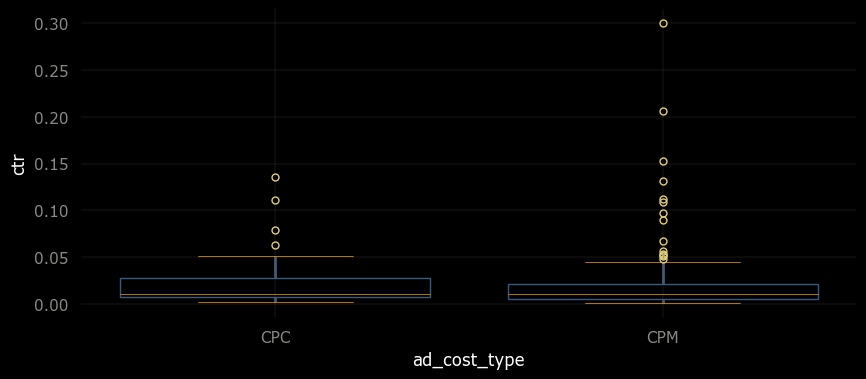

In [86]:
plt.figure(figsize=(10,4))
boxplot_style = {
    'medianprops':  {'linewidth': 4, 'color': '#571a18'},
    'flierprops':   {'marker': 'o', 'markerfacecolor': 'green', 'markersize': 8},
    'boxprops':     {'facecolor': 'none', 'edgecolor ': '#435975', 'linewidth': 1},
    'capprops':     {'color': 'orange', 'linewidth': 1}}
sns.boxplot(x = cost_type.ad_cost_type, y = cost_type.ctr, 
                                                            whiskerprops = {'linewidth': 2, 'color': '#435975'},
                                                            medianprops  = {'linewidth': 4, 'color': 'orange', 'linewidth': 0.5},
                                                            flierprops   = {'marker': 'o', 'markeredgecolor': '#e0ce79', 'markersize': 5, 'markerfacecolor' :'none', 'linewidth': 0.1},
                                                            boxprops     = {'facecolor': 'none', 'edgecolor': '#395a83', 'linewidth': 1},
                                                            capprops     = {'color': 'orange', 'linewidth': 0.5})
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)
plt.show()

Длинные хвосты сильно влияют на среднее. Если они попадлают в выборку - вся выборка уезжает далеко в сторону. Посмотрим на распределениt CTR для CPM.

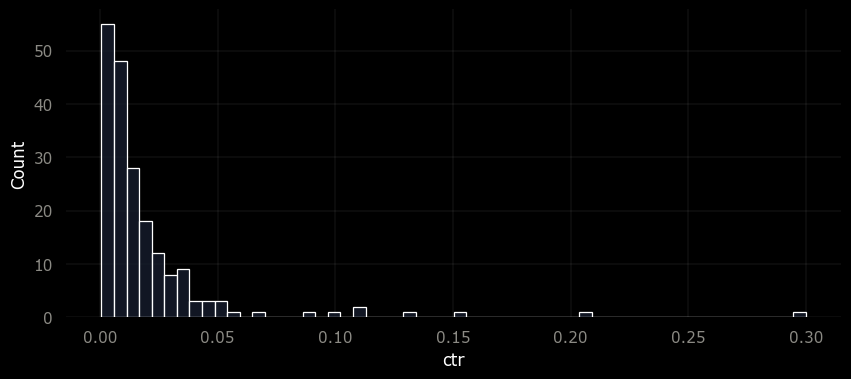

In [87]:
plt.figure(figsize=(10,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(cost_type[cost_type.ad_cost_type == 'CPM'].ctr, color='#171e2f')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

Это похоже на логнормалное распределение - распределение, логарифм значения которого формирует нормальное распределение

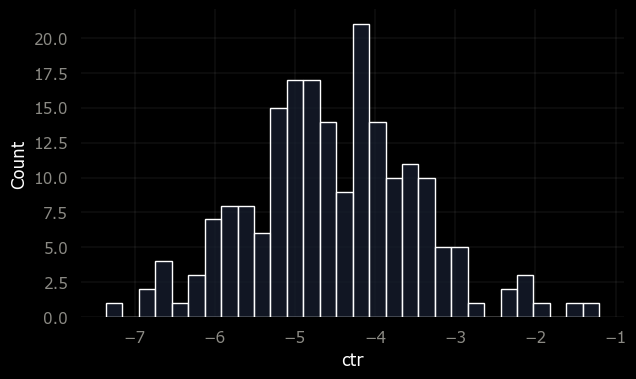

In [89]:
plt.figure(figsize=(7,4))
plt.tick_params(axis='both', colors='#8b8a84')
sns.histplot(np.log(cost_type[(cost_type.ad_cost_type == 'CPM') & (cost_type.ctr > 0)].ctr), color='#171e2f', bins = 30)
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

Проводить t-test на логнормальном распределении как-будто неправильно, поэтому проведем его на логарифме этого распределения, который вроде как близок к нормальному

In [93]:
stats.ttest_ind(cost_type[cost_type.ad_cost_type == 'CPM'].log_ctr, cost_type[cost_type.ad_cost_type == 'CPC'].log_ctr)

TtestResult(statistic=np.float64(-1.1893932279676611), pvalue=np.float64(0.23544583729841792), df=np.float64(243.0))

In [96]:
ads_data.head(3)

event,ad_id,ad_cost_type,platform,click,view
0,3,CPC,android,5.0,244.0
1,3,CPC,ios,3.0,147.0
2,3,CPC,web,1.0,99.0


In [114]:
platform_df = ads_data.groupby(['ad_id','platform'], as_index = False).agg({'click':'sum', 'view' : 'sum'}).fillna(0)
platform_df = platform_df[(platform_df.view > 100) & (platform_df.click > 0)]
platform_df['ctr'] = platform_df.click / platform_df.view
platform_df['log_ctr'] = np.log(platform_df.ctr)
platform_df

event,ad_id,platform,click,view,ctr,log_ctr
0,3,android,5.0,244.0,0.020492,-3.887730
1,3,ios,3.0,147.0,0.020408,-3.891820
6,2276,android,2.0,703.0,0.002845,-5.862210
15,4585,android,17.0,224.0,0.075893,-2.578433
16,4585,ios,24.0,148.0,0.162162,-1.819158
...,...,...,...,...,...,...
1054,121943,web,4.0,348.0,0.011494,-4.465908
1058,122063,android,1.0,126.0,0.007937,-4.836282
1061,122086,android,26.0,1019.0,0.025515,-3.668480
1062,122086,ios,16.0,599.0,0.026711,-3.622673


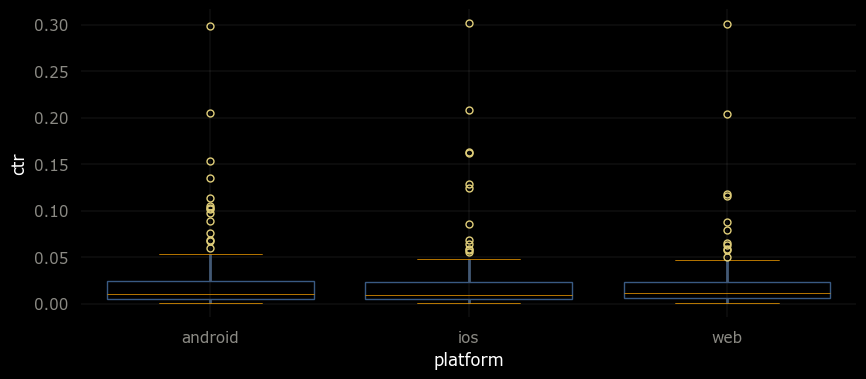

In [103]:
plt.figure(figsize=(10,4))
boxplot_style = {
    'medianprops':  {'linewidth': 4, 'color': '#571a18'},
    'flierprops':   {'marker': 'o', 'markerfacecolor': 'green', 'markersize': 8},
    'boxprops':     {'facecolor': 'none', 'edgecolor ': '#435975', 'linewidth': 1},
    'capprops':     {'color': 'orange', 'linewidth': 1}}
sns.boxplot(x = platform_df.platform, y = platform_df.ctr, 
                                                            whiskerprops = {'linewidth': 2, 'color': '#435975'},
                                                            medianprops  = {'linewidth': 4, 'color': 'orange', 'linewidth': 0.5},
                                                            flierprops   = {'marker': 'o', 'markeredgecolor': '#e0ce79', 'markersize': 5, 'markerfacecolor' :'none', 'linewidth': 0.1},
                                                            boxprops     = {'facecolor': 'none', 'edgecolor': '#395a83', 'linewidth': 1},
                                                            capprops     = {'color': 'orange', 'linewidth': 0.5})
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)
plt.show()

Логарифмированием распределения, похожего на логнормальное, получаем распределение, похожее на нормальное

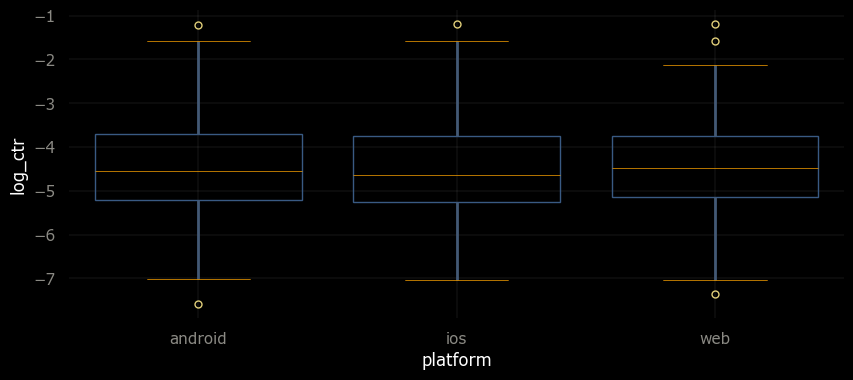

In [106]:
plt.figure(figsize=(10,4))
boxplot_style = {
    'medianprops':  {'linewidth': 4, 'color': '#571a18'},
    'flierprops':   {'marker': 'o', 'markerfacecolor': 'green', 'markersize': 8},
    'boxprops':     {'facecolor': 'none', 'edgecolor ': '#435975', 'linewidth': 1},
    'capprops':     {'color': 'orange', 'linewidth': 1}}
sns.boxplot(x = platform_df.platform, y = platform_df.log_ctr, 
                                                            whiskerprops = {'linewidth': 2, 'color': '#435975'},
                                                            medianprops  = {'linewidth': 4, 'color': 'orange', 'linewidth': 0.5},
                                                            flierprops   = {'marker': 'o', 'markeredgecolor': '#e0ce79', 'markersize': 5, 'markerfacecolor' :'none', 'linewidth': 0.1},
                                                            boxprops     = {'facecolor': 'none', 'edgecolor': '#395a83', 'linewidth': 1},
                                                            capprops     = {'color': 'orange', 'linewidth': 0.5})
plt.tick_params(axis='both', colors='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)
plt.show()

Теперь вопрос - как сравнить не два средних, а три. По сути точно так же - вопрос в том принадлежат ли все три выборки одгному распределению, то есть есть ли между любыми двумя средними различие больше шести стнадартных отклонений. Если есть, то по крайней мере какая-то выборка из трех скорее всего принадлежит распределению с другим средним.

Если вариантов немного, то можно сравнить каждую выборку с каждой ...

In [125]:
tstatistic1, pvalue1 = stats.ttest_ind(platform_df[platform_df.platform == 'android'].log_ctr, platform_df[platform_df.platform == 'ios'].log_ctr)
tstatistic2, pvalue2 = stats.ttest_ind(platform_df[platform_df.platform == 'android'].log_ctr, platform_df[platform_df.platform == 'web'].log_ctr)
tstatistic3, pvalue3 = stats.ttest_ind(platform_df[platform_df.platform == 'ios'].log_ctr, platform_df[platform_df.platform == 'web'].log_ctr)
print(f' Android vs IOS: {round(pvalue1, 4)} \n\
 Android vs web: {round(pvalue2, 4)}\n\
 IOS vs web:     {round(pvalue3, 4)}      ')

 Android vs IOS: 0.7061 
 Android vs web: 0.8878
 IOS vs web:     0.6432      


... или использовать специальную функцию

In [127]:
stats.f_oneway(platform_df[platform_df.platform == 'android'].log_ctr,
               platform_df[platform_df.platform == 'web'].log_ctr,
               platform_df[platform_df.platform == 'ios'].log_ctr)

F_onewayResult(statistic=np.float64(0.12221144552264519), pvalue=np.float64(0.8849852963319769))

Итак, в основе т-теста лежит нормальность распределения в выборке, как убедиться в том, что выборка 